# Phần này phân tích cơ sở dữ liệu thực phẩm của Bộ Nông nghiệp Hoa Kỳ (USDA), chứa thông tin dinh dưỡng của hàng nghìn loại thực phẩm.

## 1.Định nghĩa vấn đề

Trong bối cảnh nhu cầu phân tích và quản lý dinh dưỡng ngày càng quan trọng, việc hiểu rõ hàm lượng và mối quan hệ giữa các chất dinh dưỡng trong thực phẩm là cần thiết.
Bài toán nhằm phân tích dữ liệu thực phẩm từ USDA, qua đó khám phá:

* Sự khác biệt về giá trị dinh dưỡng giữa các nhóm thực phẩm;

* Mối tương quan giữa các chất như Energy, Protein, Fat, Water;

* Cơ sở cho việc đánh giá và so sánh thành phần dinh dưỡng của thực phẩm.

## 2. Các bước thực hiện 

### Nạp dữ liệu JSON


In [48]:
import json 
db = json.load(open("database.json")) 
len(db)


6636

In [ ]:
# Xem cấu trúc 1 phần tử trong file
db[0].keys() 


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
# Xem thông tin dinh dưỡng của phần tử đầu tiên
db[0]["nutrients"][0] 

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

### Tạo bảng dinh dưỡng (nutrients)

In [51]:
import pandas as pd
nutrients = pd.DataFrame(db[0]["nutrients"]) 
nutrients.head(7) 


,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


### Lấy thông tin chung của thực phẩm


In [52]:
info_keys = ["description", "group", "id", "manufacturer"] 
info = pd.DataFrame(db, columns=info_keys) 
info.head() 

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [ ]:
# Kiểm tra thông tin của DataFrame
info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [ ]:
# Thống kê nhóm thực phẩm
pd.value_counts(info["group"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\2082787924.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

### Gộp dữ liệu dinh dưỡng của tất cả món ăn

In [55]:
nutrients = [] 
for rec in db: 
 fnuts = pd.DataFrame(rec["nutrients"]) 
 fnuts["id"] = rec["id"] 
 nutrients.append(fnuts) 
nutrients = pd.concat(nutrients, ignore_index=True) 

In [ ]:
# Kiểm tra dữ liệu bảng nutrients
nutrients 

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


### Xử lý dữ liệu

In [ ]:
# Đếm số dòng dữ liệu bị trùng
nutrients.duplicated().sum()

14179

In [ ]:
# Xóa các dòng dữ liệu trùng lặp
nutrients = nutrients.drop_duplicates() 

### Đổi tên cột của bảng nhóm thực phẩm để tránh trùng lặp khi gộp dữ liệu

In [59]:
col_mapping = {"description" : "food", "group" : "fgroup"} 
info = info.rename(columns=col_mapping, copy=False) 
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


### Đổi tên cột của bảng dinh dưỡng cho rõ ràng hơn

In [60]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"} 
nutrients = nutrients.rename(columns=col_mapping, copy=False) 
nutrients 

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


### Gộp hai bảng nhóm thực phẩm và dinh dưỡng lại với nhau theo cột id

In [61]:
ndata = pd.merge(nutrients, info, on="id") 
ndata.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [62]:
#Xem chi tiết thông tin của một dòng cụ thể trong bảng ndata
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

## 3.Phân tích khám phá dữ liệu

#### Tính trung vị (median) của mỗi chất dinh dưỡng theo nhóm thực phẩm và vẽ biểu đồ cho “Zinc, Zn”

<Axes: ylabel='fgroup'>

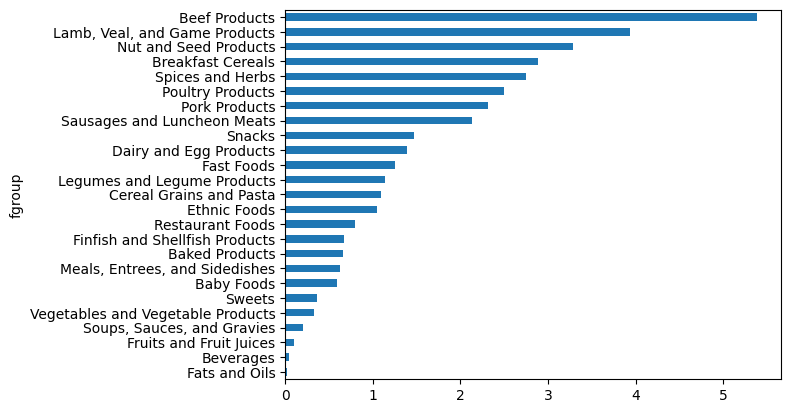

In [63]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5) 
result["Zinc, Zn"].sort_values().plot(kind="barh") 


#### Tìm thực phẩm có hàm lượng cao nhất cho từng chất dinh dưỡng và rút gọn tên thực phẩm

In [64]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"]) 
def get_maximum(x): 
 return x.loc[x.value.idxmax()] 
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]] 
# make the food a little smaller 
max_foods["food"] = max_foods["food"].str[:50] 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\3456134986.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [ ]:
# Xem danh sách thực phẩm có hàm lượng cao nhất trong nhóm “Amino Acids”
max_foods.loc["Amino Acids"]["food"] 

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

### 3.1 Phân tích mô tả

#### Trung bình năng lượng (kcal) của từng nhóm thực phẩm là bao nhiêu?

In [66]:
# Lọc các dòng có chất dinh dưỡng là "Energy"
# Sau đó nhóm theo 'fgroup' (nhóm thực phẩm)
# Và tính giá trị trung bình năng lượng (kcal) cho từng nhóm
ndata[ndata['nutrient'] == "Energy"].groupby('fgroup')['value'].mean()


fgroup
Baby Foods                            426.389952
Baked Products                        931.931452
Beef Products                         559.323625
Beverages                             303.875899
Breakfast Cereals                     824.916873
Cereal Grains and Pasta               739.040984
Dairy and Egg Products                514.355140
Ethnic Foods                          541.821212
Fast Foods                            647.979452
Fats and Oils                        1460.969072
Finfish and Shellfish Products        350.549020
Fruits and Fruit Juices               222.745427
Lamb, Veal, and Game Products         552.879710
Legumes and Legume Products           529.441096
Meals, Entrees, and Sidedishes        404.964912
Nut and Seed Products                1270.308594
Pork Products                         557.013720
Poultry Products                      522.900862
Restaurant Foods                      598.333333
Sausages and Luncheon Meats           611.954955
Snacks       

Nhận xét: 
* Fats and Oils (1460.97 kcal) là nhóm có năng lượng cao nhất — chủ yếu do chứa nhiều chất béo.
* Nut and Seed Products (1270.31 kcal) và Snacks (1152.15 kcal) cũng có năng lượng cao vì mật độ dinh dưỡng lớn.
* Vegetables and Vegetable Products (162.05 kcal) có năng lượng thấp nhất, phù hợp với đặc điểm ít chất béo và nhiều nước.
* Các nhóm như Baked Products, Sweets, và Breakfast Cereals có mức năng lượng cao, phản ánh lượng đường và tinh bột nhiều.
* Fruits and Fruit Juices và Soups, Sauces, and Gravies là nhóm có năng lượng thấp, thường dùng làm món phụ hoặc bổ sung.

#### Loại thực phẩm nào chứa protein cao nhất trong nhóm “Dairy and Egg Products”?

In [67]:
# Lọc các thực phẩm thuộc nhóm "Dairy and Egg Products"
# Và có chất dinh dưỡng là "Protein"
# Sắp xếp giảm dần theo hàm lượng protein
# Lấy ra 10 loại thực phẩm có hàm lượng protein cao nhất trong nhóm này
ndata[(ndata['fgroup'] == "Dairy and Egg Products") & (ndata['nutrient'] == "Protein")] \
    .sort_values('value', ascending=False) \
    .head(10)


,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
278540,41.60,g,Protein,Composition,43340,"Cheese, parmesan, low sodium",Dairy and Egg Products,None
3464,40.00,g,Protein,Composition,1185,"Parmesan cheese topping, fat free",Dairy and Egg Products,
1845,36.16,g,Protein,Composition,1091,"Milk, dry, nonfat, regular, without added vita...",Dairy and Egg Products,
277266,35.80,g,Protein,Composition,43260,"Beverage, instant breakfast powder, chocolate,...",Dairy and Egg Products,None
1990,35.50,g,Protein,Composition,1093,"Milk, dry, nonfat, calcium reduced",Dairy and Egg Products,
1919,35.10,g,Protein,Composition,1092,"Milk, dry, nonfat, instant, with added vitamin...",Dairy and Egg Products,
2045,34.30,g,Protein,Composition,1094,"Milk, buttermilk, dried",Dairy and Egg Products,
422,31.80,g,Protein,Composition,1038,"Cheese, romano",Dairy and Egg Products,
274457,31.70,g,Protein,Composition,42304,"Cheese, mozzarella, nonfat",Dairy and Egg Products,None
281677,28.40,g,Protein,Composition,43589,"Cheese, swiss, low fat",Dairy and Egg Products,None


Nhận xét:
* Phô mai Parmesan (ít natri) đứng đầu, chứa hàm lượng protein rất cao, gấp ~2 lần so với sữa bột tách béo.
* Các loại phô mai và sữa bột nói chung đều có hàm lượng protein cao do cô đặc hàm lượng dinh dưỡng sau quá trình tách nước.
* So với các sản phẩm từ sữa tươi hoặc đồ uống, nhóm phô mai và sữa khô luôn cung cấp nguồn protein đậm đặc nhất.

#### Nhóm nào có độ đa dạng dinh dưỡng cao nhất (nhiều loại chất khác nhau)?

In [68]:
# Tính độ đa dạng dinh dưỡng của từng nhóm thực phẩm
# → Đếm số lượng chất dinh dưỡng (nutrient) khác nhau trong mỗi nhóm (fgroup)
# Sau đó sắp xếp giảm dần để xem nhóm nào có nhiều loại chất dinh dưỡng nhất
diversity = ndata.groupby('fgroup')['nutrient'].nunique().sort_values(ascending=False)

# In ra kết quả
print(diversity)


fgroup
Vegetables and Vegetable Products    94
Sweets                               93
Dairy and Egg Products               93
Snacks                               92
Fats and Oils                        92
Nut and Seed Products                91
Fruits and Fruit Juices              91
Baked Products                       91
Legumes and Legume Products          91
Ethnic Foods                         90
Restaurant Foods                     90
Soups, Sauces, and Gravies           89
Sausages and Luncheon Meats          89
Poultry Products                     89
Baby Foods                           89
Finfish and Shellfish Products       89
Fast Foods                           89
Breakfast Cereals                    89
Beverages                            89
Meals, Entrees, and Sidedishes       88
Pork Products                        88
Cereal Grains and Pasta              88
Spices and Herbs                     88
Beef Products                        88
Lamb, Veal, and Game Products    

Nhận xét:
* Rau củ quả (Vegetables and Vegetable Products) có độ đa dạng dinh dưỡng cao nhất, phản ánh sự phong phú tự nhiên về vitamin, khoáng chất, chất xơ và hợp chất vi lượng.
* Các nhóm sữa, trứng, hạt, bánh ngọt cũng có nhiều loại chất dinh dưỡng, do thường được chế biến hoặc bổ sung vi chất.
* Những nhóm như thịt đỏ (Lamb, Veal, Beef) có ít loại chất hơn (khoảng 86–88), chủ yếu tập trung vào protein, chất béo và khoáng.


### 3.2 Phân tích so sánh

#### So sánh hàm lượng protein và lipid (chất béo) giữa nhóm “Meat” và “Dairy”?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo bảng pivot: mỗi hàng là 1 thực phẩm, mỗi cột là 1 chất dinh dưỡng
pivot = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# Gắn cột nhóm thực phẩm (fgroup)
pivot = pivot.join(ndata[['food', 'fgroup']].drop_duplicates().set_index('food'))

pivot.head()


,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn",fgroup
food,,,,,,,,,,,,,,,,,,,,,
AMARANTH FLAKES,NaN,NaN,0.0,NaN,3.27,NaN,NaN,NaN,0.0,17.0,...,0.0,0.0,NaN,NaN,1.31,0.0,2.4,3.00,0.25,Breakfast Cereals
"APPLEBEE'S, 9 oz house sirloin steak",NaN,1.522,NaN,1.790,2.35,2.425,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.11,4.93,Restaurant Foods
"APPLEBEE'S, Double Crunch Shrimp",NaN,0.716,NaN,1.029,2.45,1.238,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,2.41,NaN,NaN,40.46,0.87,Restaurant Foods
"APPLEBEE'S, French fries",NaN,NaN,NaN,NaN,2.55,NaN,27.0,NaN,NaN,21.0,...,NaN,NaN,NaN,NaN,1.38,NaN,25.5,43.28,0.49,Restaurant Foods
"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid's menu",NaN,0.224,NaN,0.245,1.67,0.427,NaN,NaN,NaN,123.0,...,NaN,NaN,NaN,NaN,0.47,NaN,NaN,65.09,0.85,Restaurant Foods


In [70]:
# Xác định từ khóa cho nhóm thịt (meat)
meat_keywords = ['meat', 'beef', 'pork', 'veal', 'lamb', 'poultry', 'game']

# Gắn nhãn nhóm tổng hợp
pivot['group_label'] = pivot['fgroup'].apply(
    lambda x: 'Meat and Meat Products' if any(k in x.lower() for k in meat_keywords)
    else ('Dairy and Egg Products' if 'dairy' in x.lower() or 'egg' in x.lower() else None)
)

# Giữ lại 2 nhóm cần so sánh
compare_data = pivot[pivot['group_label'].isin(['Meat and Meat Products', 'Dairy and Egg Products'])]

compare_data.head()


,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn",fgroup,group_label
food,,,,,,,,,,,,,,,,,,,,,
"BUTCHER BOY MEATS, INC., Turkey Franks",NaN,NaN,NaN,NaN,4.66,NaN,NaN,NaN,NaN,148.0,...,0.3,NaN,NaN,NaN,NaN,NaN,59.06,2.88,Sausages and Luncheon Meats,Meat and Meat Products
Bacon and beef sticks,NaN,1.480,0.0,1.516,4.30,2.073,NaN,NaN,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,1.6,21.60,3.23,Sausages and Luncheon Meats,Meat and Meat Products
"Beef sausage, fresh, cooked",NaN,1.257,0.0,1.209,2.34,1.768,NaN,10.4,0.0,11.0,...,0.5,NaN,0.5,0.24,0.0,1.1,51.12,4.38,Sausages and Luncheon Meats,Meat and Meat Products
"Beef sausage, pre-cooked",NaN,0.984,0.0,0.940,3.16,0.000,NaN,7.3,0.0,15.0,...,0.6,NaN,0.6,0.49,0.0,2.1,43.75,2.92,Sausages and Luncheon Meats,Meat and Meat Products
"Beef, bologna, reduced sodium",NaN,NaN,0.0,NaN,3.10,NaN,NaN,4.8,0.0,12.0,...,0.7,NaN,NaN,0.19,0.0,0.3,54.80,2.00,Sausages and Luncheon Meats,Meat and Meat Products


In [71]:
# Tính trung bình 2 chất chính: Protein và Total lipid (fat)
compare = compare_data.groupby('group_label')[['Protein', 'Total lipid (fat)']].mean()
compare


,Protein,Total lipid (fat)
group_label,,
Dairy and Egg Products,14.216449,10.319346
Meat and Meat Products,23.089394,12.896555


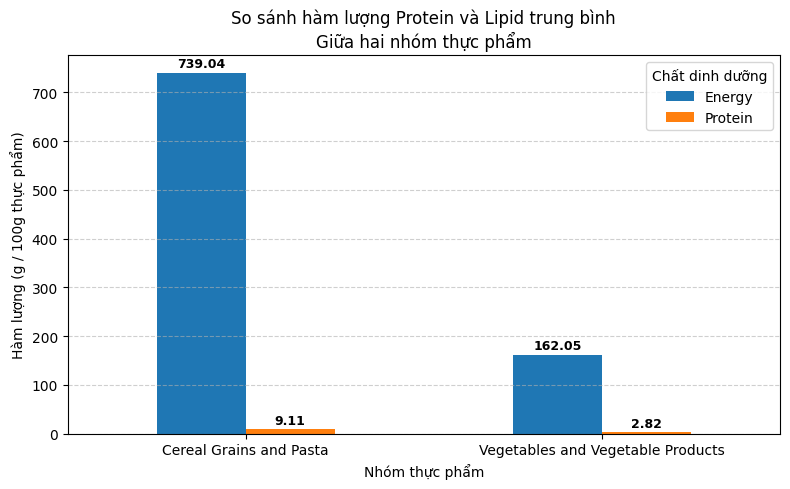

In [91]:
ax = compare.plot(kind='bar', figsize=(8,5), color=['#1f77b4','#ff7f0e'])
plt.title('So sánh hàm lượng Protein và Lipid trung bình\nGiữa hai nhóm thực phẩm')
plt.ylabel('Hàm lượng (g / 100g thực phẩm)')
plt.xlabel('Nhóm thực phẩm')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Chất dinh dưỡng')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, fontweight='bold', padding=2)
plt.show()


Nhận xét:
* Nhóm Meat and Meat Products có hàm lượng protein (23.09 g/100g) và lipid (12.90 g/100g) đều cao hơn so với nhóm Dairy and Egg Products (protein 14.22 g, lipid 10.32 g).
* Điều này phản ánh đặc điểm tự nhiên của thịt là nguồn cung cấp protein hoàn chỉnh và giàu năng lượng hơn.
* Ngược lại, nhóm Dairy and Egg Products có hàm lượng protein vừa phải và chất béo thấp hơn, phù hợp cho chế độ ăn cân bằng hoặc kiểm soát chất béo.
* Nhìn chung, thịt giàu dinh dưỡng hơn về hàm lượng nhưng sản phẩm sữa lại đa dạng hơn và dễ kết hợp trong chế độ ăn hằng ngày.


#### Tỷ lệ Energy-to-Protein khác biệt thế nào giữa nhóm “Grains” và “Vegetables”?

In [92]:
# Mỗi hàng là 1 thực phẩm, mỗi cột là 1 chất dinh dưỡng
pivot = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# Gắn nhóm thực phẩm
pivot = pivot.join(ndata[['food', 'fgroup']].drop_duplicates().set_index('food'))

pivot.head()


,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn",fgroup
food,,,,,,,,,,,,,,,,,,,,,
AMARANTH FLAKES,NaN,NaN,0.0,NaN,3.27,NaN,NaN,NaN,0.0,17.0,...,0.0,0.0,NaN,NaN,1.31,0.0,2.4,3.00,0.25,Breakfast Cereals
"APPLEBEE'S, 9 oz house sirloin steak",NaN,1.522,NaN,1.790,2.35,2.425,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.11,4.93,Restaurant Foods
"APPLEBEE'S, Double Crunch Shrimp",NaN,0.716,NaN,1.029,2.45,1.238,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,2.41,NaN,NaN,40.46,0.87,Restaurant Foods
"APPLEBEE'S, French fries",NaN,NaN,NaN,NaN,2.55,NaN,27.0,NaN,NaN,21.0,...,NaN,NaN,NaN,NaN,1.38,NaN,25.5,43.28,0.49,Restaurant Foods
"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid's menu",NaN,0.224,NaN,0.245,1.67,0.427,NaN,NaN,NaN,123.0,...,NaN,NaN,NaN,NaN,0.47,NaN,NaN,65.09,0.85,Restaurant Foods


In [74]:
# Chỉ lấy nhóm Grains và Vegetables
subset = pivot[pivot['fgroup'].str.contains('Grain|Vegetable', case=False, na=False)]

# Kiểm tra
subset['fgroup'].value_counts()


fgroup
Vegetables and Vegetable Products    812
Cereal Grains and Pasta              183
Name: count, dtype: int64

In [75]:
# Lọc hai nhóm cần so sánh (Grains & Vegetables)
subset = pivot[pivot['fgroup'].str.contains('Grain|Vegetable', case=False, na=False)]
subset.head()



,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn",fgroup
food,,,,,,,,,,,,,,,,,,,,,
"Alfalfa seeds, sprouted, raw",NaN,NaN,0.0,NaN,0.40,NaN,NaN,0.4,0.0,32.0,...,0.0,0.0,NaN,NaN,0.02,0.0,30.5,92.82,0.92,Vegetables and Vegetable Products
"Amaranth grain, cooked",NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,NaN,47.0,...,NaN,NaN,NaN,NaN,0.19,NaN,NaN,75.16,0.86,Cereal Grains and Pasta
"Amaranth leaves, cooked, boiled, drained, with salt",NaN,0.119,NaN,0.104,2.11,0.196,NaN,NaN,NaN,209.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,91.49,0.88,Vegetables and Vegetable Products
"Amaranth leaves, cooked, boiled, drained, without salt",NaN,0.119,NaN,0.104,2.11,0.196,NaN,NaN,NaN,209.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,91.49,0.88,Vegetables and Vegetable Products
"Amaranth leaves, raw",NaN,0.139,NaN,0.121,1.50,0.229,NaN,NaN,NaN,215.0,...,0.0,0.0,NaN,NaN,NaN,NaN,1140.0,91.69,0.90,Vegetables and Vegetable Products


In [76]:
# Tính trung bình của Energy và Protein theo nhóm
compare = subset.groupby('fgroup')[['Energy', 'Protein']].mean()
compare



,Energy,Protein
fgroup,,
Cereal Grains and Pasta,739.040984,9.106831
Vegetables and Vegetable Products,162.051724,2.815813


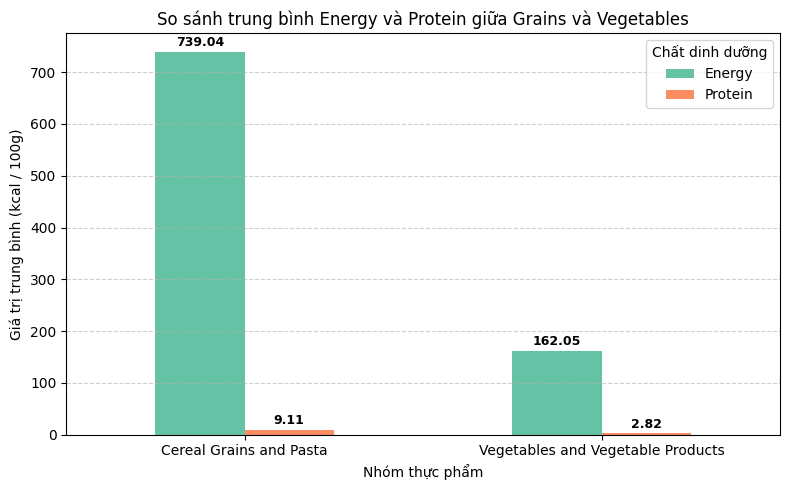

In [77]:
ax = compare.plot(kind='bar', color=['#66c2a5', '#fc8d62'], figsize=(8,5))

plt.title('So sánh trung bình Energy và Protein giữa Grains và Vegetables')
plt.ylabel('Giá trị trung bình (kcal / 100g)')
plt.xlabel('Nhóm thực phẩm')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Chất dinh dưỡng')
plt.tight_layout()

# 🟡 Thêm số lên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, fontweight='bold', padding=2)

plt.show()



Nhận xét:
* Nhóm “Cereal Grains and Pasta” có tỷ lệ Energy-to-Protein cao (739.04 kcal / 9.11g ≈ 36.4), cho thấy năng lượng cao nhưng protein rất thấp.
* Nhóm “Vegetables and Vegetable Products” có tỷ lệ thấp hơn (162.05 kcal / 2.82g ≈ 12), với năng lượng và protein đều thấp hơn, nhưng tỷ lệ vẫn cao do protein chiếm tỷ lệ nhỏ.
* Sự khác biệt cho thấy “Grains” cung cấp năng lượng vượt trội nhưng ít protein hơn so với “Vegetables”, nơi năng lượng và protein thấp hơn nhưng cân đối hơn .

### 3.3 Phân tích tương quan

In [78]:
# Có mối tương quan nào giữa năng lượng (Energy) và hàm lượng chất béo (Fat)?
# Nhóm thực phẩm nào có năng lượng cao nhưng protein thấp (chất “rỗng”)?
# Các loại thực phẩm giàu “Water” có xu hướng ít năng lượng hơn không?

# Chọn các chất dinh dưỡng quan trọng để phân tích tương quan
import seaborn as sns
nutrients_focus = ['Energy', 'Protein', 'Total lipid (fat)', 'Water']

# Tạo pivot_table: mỗi thực phẩm là 1 dòng, mỗi cột là 1 chất dinh dưỡng
pivot_corr = (
    ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')
    [nutrients_focus]
)


In [79]:
# Thêm nhóm thực phẩm
pivot_corr = pivot_corr.join(
    ndata[['food', 'fgroup']].drop_duplicates().set_index('food')
)

# Tính hệ số tương quan giữa Energy và các chất khác theo từng nhóm
corr_list = []

for group, df in pivot_corr.groupby('fgroup'):
    corr = df[nutrients_focus].corr()
    corr_energy = corr.loc['Energy', ['Protein', 'Total lipid (fat)', 'Water']]
    corr_energy.name = group
    corr_list.append(corr_energy)

corr_by_group = pd.DataFrame(corr_list)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\1327505.py:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Anaconda\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


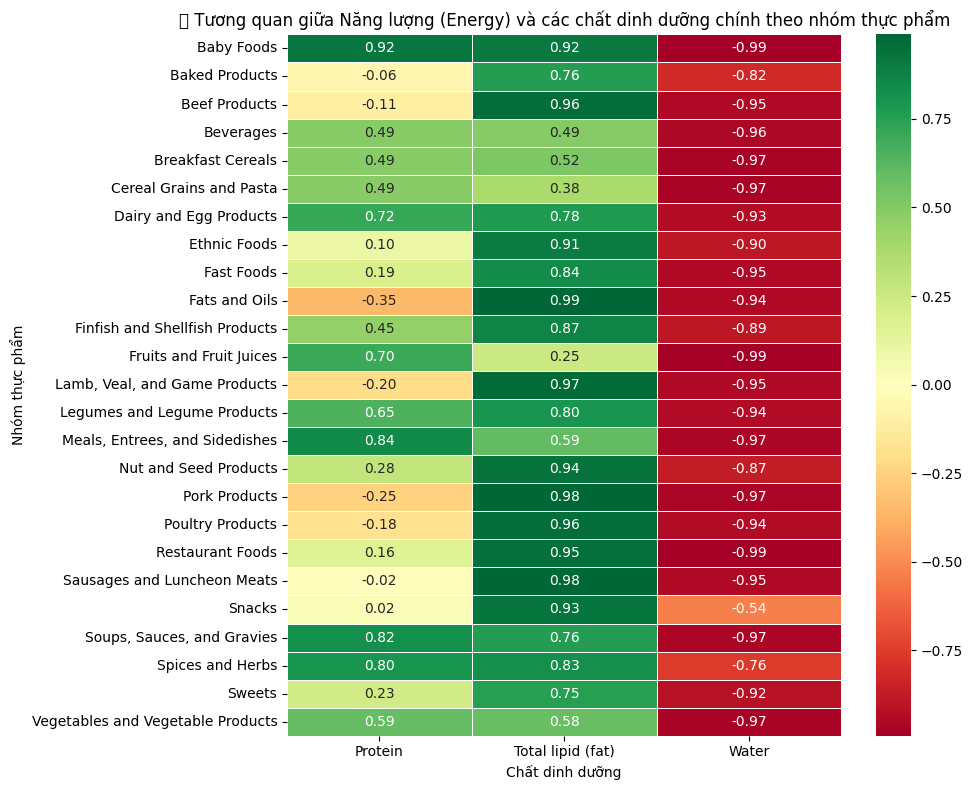

In [80]:
# 🔥 Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_by_group,
    annot=True,
    cmap='RdYlGn',
    center=0,
    linewidths=0.5,
    fmt=".2f"
)

plt.title('🔥 Tương quan giữa Năng lượng (Energy) và các chất dinh dưỡng chính theo nhóm thực phẩm')
plt.xlabel('Chất dinh dưỡng')
plt.ylabel('Nhóm thực phẩm')
plt.tight_layout()
plt.show()


#### Có mối tương quan nào giữa năng lượng (Energy) và hàm lượng chất béo (Fat)?

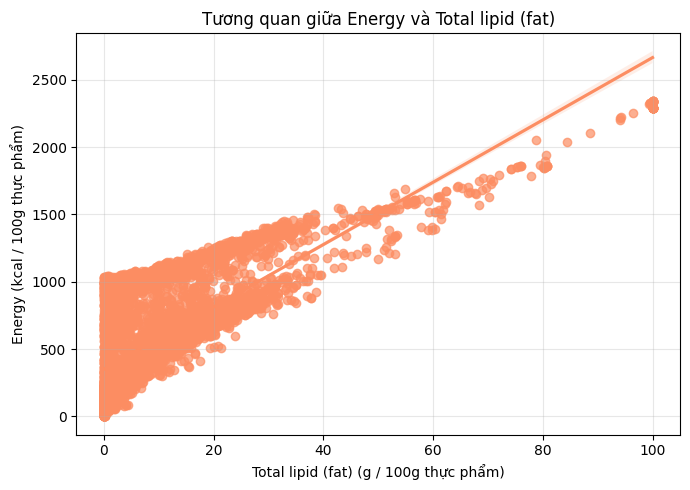

In [ ]:


# Lấy bảng nutrient theo food
pivot_corr = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# Vẽ tương quan Energy - Fat
plt.figure(figsize=(7,5))
sns.regplot(
    data=pivot_corr,
    x='Total lipid (fat)',
    y='Energy',
    color='#fc8d62',
    scatter_kws={'alpha':0.7}
)
plt.title('Tương quan giữa Energy và Total lipid (fat)')
plt.xlabel('Total lipid (fat) (g / 100g thực phẩm)')
plt.ylabel('Energy (kcal / 100g thực phẩm)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Nhận xét:
* Có mối tương quan thuận mạnh giữa năng lượng (Energy) và hàm lượng chất béo (Total lipid - fat).
* Khi hàm lượng chất béo tăng, năng lượng trong thực phẩm cũng tăng đáng kể.
* Điều này phù hợp với đặc tính dinh dưỡng vì 1g chất béo cung cấp khoảng 9 kcal, cao hơn so với protein hay carbohydrate.
* Một số điểm ngoại lệ cho thấy có thực phẩm năng lượng cao nhưng không chứa nhiều chất béo (có thể do đường hoặc tinh bột).

#### Nhóm thực phẩm nào có năng lượng cao nhưng protein thấp (chất “rỗng”)?

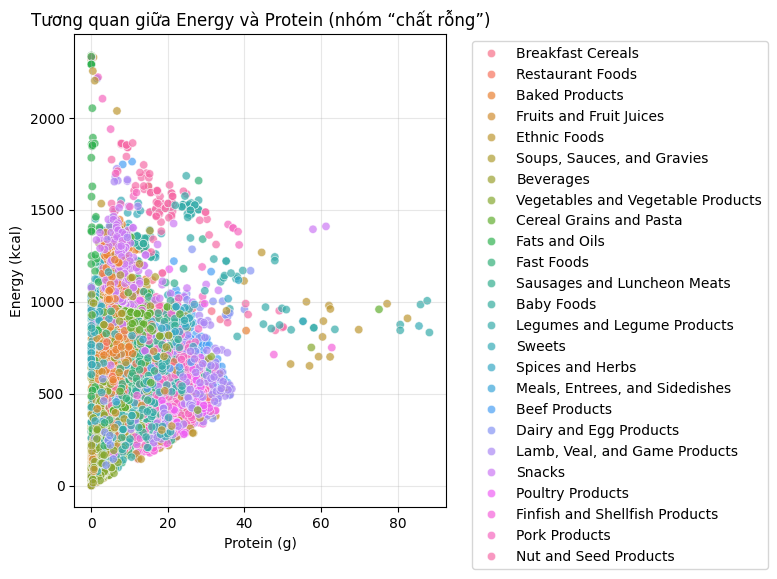

In [93]:
# Tạo bảng tổng hợp (pivot table) để so sánh năng lượng và protein của từng thực phẩm
# - 'values' = 'value' → giá trị dinh dưỡng
# - 'index' = ['food', 'fgroup'] → mỗi thực phẩm và nhóm thực phẩm là một dòng
# - 'columns' = 'nutrient' → mỗi loại chất dinh dưỡng là một cột
# - 'aggfunc' = 'mean' → lấy giá trị trung bình nếu có nhiều mẫu

nutrient_compare = ndata.pivot_table(
    values='value',
    index=['food', 'fgroup'],
    columns='nutrient',
    aggfunc='mean'
)

# Chỉ lấy hai cột cần phân tích: Energy và Protein
# Loại bỏ các dòng có giá trị thiếu (NaN)
nutrient_compare = nutrient_compare[['Energy', 'Protein']].dropna()


plt.figure(figsize=(8,6))
sns.scatterplot(data=nutrient_compare, x='Protein', y='Energy', hue='fgroup', alpha=0.7)
plt.title('Tương quan giữa Energy và Protein (nhóm “chất rỗng”)')
plt.xlabel('Protein (g)')
plt.ylabel('Energy (kcal)')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Nhận xét:
* Các nhóm Beverages, Sweets, và Fats and Oils có năng lượng cao (trên 1000 kcal) nhưng protein thấp (dưới 20g).
* Khi năng lượng tăng cao, protein trong các nhóm này vẫn giữ ở mức thấp. Điều này cho thấy chúng là nguồn chất "rỗng" do thiếu protein đáng kể so với năng lượng cung cấp.
* Một số điểm ngoại lệ thuộc Restaurant Foods và Baked Products cũng có xu hướng năng lượng cao nhưng protein thấp (dưới 20-30g).

#### Các loại thực phẩm giàu “Water” có xu hướng ít năng lượng hơn không?

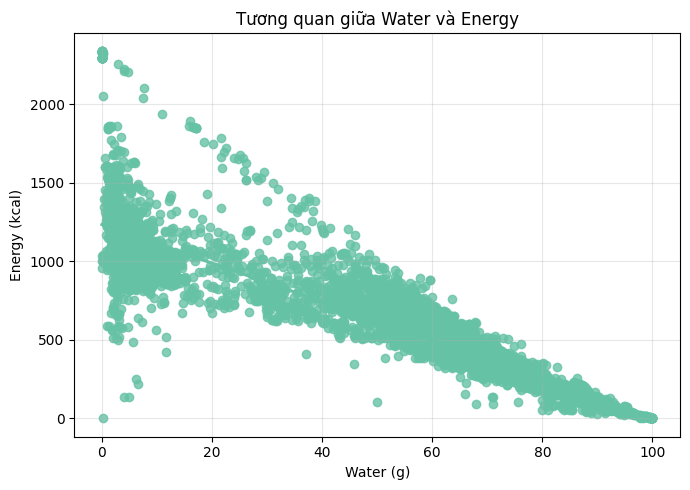

In [94]:
# Tạo bảng tổng hợp (pivot table) để phân tích mối quan hệ giữa Water và Energy
# - 'values' = 'value' → giá trị dinh dưỡng
# - 'index' = 'food' → mỗi loại thực phẩm là một dòng
# - 'columns' = 'nutrient' → mỗi chất dinh dưỡng là một cột
# - 'aggfunc' = 'mean' → lấy giá trị trung bình nếu có nhiều bản ghi cho cùng một thực phẩm

water_energy = ndata.pivot_table(
    values='value',
    index='food',
    columns='nutrient',
    aggfunc='mean'
)[['Water', 'Energy']].dropna()

plt.figure(figsize=(7,5))
sns.regplot(data=water_energy, x='Water', y='Energy', color='#66c2a5')
plt.title('Tương quan giữa Water và Energy')
plt.xlabel('Water (g)')
plt.ylabel('Energy (kcal)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Nhận xét:
* Các thực phẩm có hàm lượng nước (Water) cao (trên 60g) thường có năng lượng thấp (dưới 500 kcal).
* Khi hàm lượng nước tăng, năng lượng trong thực phẩm giảm rõ rệt. Điều này phù hợp vì nước không cung cấp calo, làm loãng năng lượng từ các chất khác.
* Một số ngoại lệ với năng lượng cao (trên 1000 kcal) có thể xuất hiện dù hàm lượng nước cao, do thành phần chất béo hoặc đường.

### 3.4 Phân tích dự đoán

#### Có thể xác định “bộ chỉ số dinh dưỡng cân bằng” (protein/fat/carbs/fiber/energy) cho từng nhóm để hỗ trợ:
+ khuyến nghị dinh dưỡng cá nhân;
+ thiết kế thực đơn sức khỏe;

In [84]:
# Tạo pivot table trung bình các chất dinh dưỡng chính theo nhóm
bni_cols = ['Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference', 'Fiber, total dietary']

bni = ndata.pivot_table(
    values='value',
    index='fgroup',
    columns='nutrient',
    aggfunc='mean'
)[bni_cols].dropna()

bni.head()


nutrient,Energy,Protein,Total lipid (fat),"Carbohydrate, by difference","Fiber, total dietary"
fgroup,,,,,
Baby Foods,426.389952,4.226220,6.628373,22.125789,0.852525
Baked Products,931.931452,6.734214,12.144919,56.978790,2.905180
Beef Products,559.323625,24.763560,12.330243,0.074013,0.004369
Beverages,303.875899,1.336727,0.991151,21.299173,0.637826
Breakfast Cereals,824.916873,7.602556,3.633871,67.871712,6.431592


In [95]:
from sklearn.preprocessing import MinMaxScaler
# Chuẩn hóa dữ liệu BNI về thang [0,1] để so sánh công bằng giữa các nhóm thực phẩm
scaler = MinMaxScaler()
bni_scaled = pd.DataFrame(
    scaler.fit_transform(bni),
    columns=bni.columns,
    index=bni.index
)

# Xem trước vài dòng đầu
bni_scaled.head()



nutrient,Energy,Protein,Total lipid (fat),"Carbohydrate, by difference","Fiber, total dietary"
fgroup,,,,,
Baby Foods,0.203507,0.142371,0.103195,0.325258,0.097979
Baked Products,0.592709,0.247104,0.196927,0.839332,0.333887
Beef Products,0.305848,1.000000,0.200076,0.000000,0.000502
Beverages,0.109186,0.021707,0.007412,0.313066,0.073304
Breakfast Cereals,0.510321,0.283365,0.052315,1.000000,0.739172


In [96]:
# Chuẩn hóa dữ liệu để so sánh công bằng
bni_scaled['BNI'] = bni_scaled.mean(axis=1)
bni_scaled = bni_scaled.sort_values('BNI', ascending=False)
bni_scaled.head(10)


nutrient,Energy,Protein,Total lipid (fat),"Carbohydrate, by difference","Fiber, total dietary",BNI
fgroup,,,,,,
Nut and Seed Products,0.853216,0.586410,0.638459,0.432064,1.000000,0.702030
Snacks,0.762245,0.374253,0.285600,0.948064,0.631868,0.600406
Breakfast Cereals,0.510321,0.283365,0.052315,1.000000,0.739172,0.517035
Cereal Grains and Pasta,0.444208,0.346183,0.028895,0.859037,0.645623,0.464789
Spices and Herbs,0.383873,0.570767,0.280286,0.218018,0.782087,0.447006
Fats and Oils,1.000000,0.000000,1.000000,0.118462,0.109307,0.445554
Baked Products,0.592709,0.247104,0.196927,0.839332,0.333887,0.441992
Legumes and Legume Products,0.282843,0.606082,0.123455,0.299584,0.700995,0.402592
Sweets,0.524356,0.147211,0.173274,0.819685,0.259541,0.384813


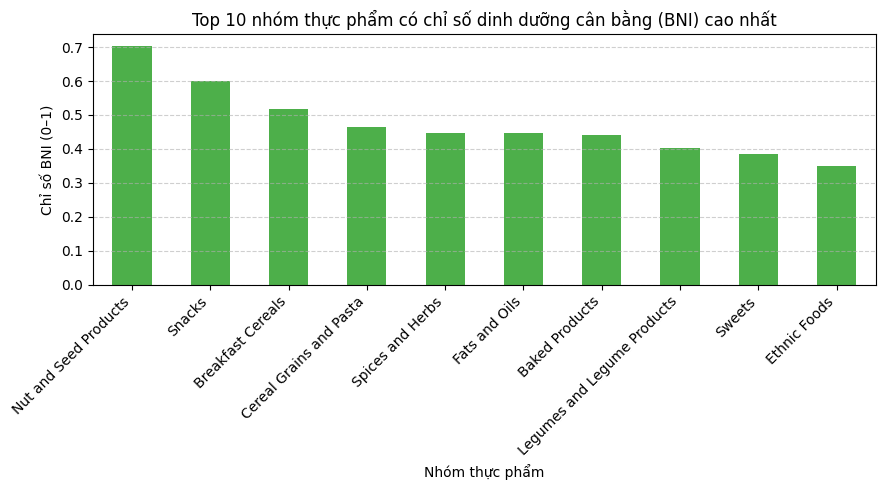

In [97]:
# Vẽ biểu đồ Top 10 nhóm có BNI cao nhất
plt.figure(figsize=(9,5))
bni_scaled['BNI'].sort_values(ascending=False).head(10).plot(
    kind='bar', color='#4daf4a'
)
plt.title('Top 10 nhóm thực phẩm có chỉ số dinh dưỡng cân bằng (BNI) cao nhất')
plt.ylabel('Chỉ số BNI (0–1)')
plt.xlabel('Nhóm thực phẩm')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Nhận xét:
* Có thể xác định được, dựa trên dữ liệu từ biểu đồ Top 10, với Nut and Seed Products đạt BNI cao nhất (0.7) và Ethnic Foods thấp nhất (0.3).
* BNI là "Balanced Nutrition Index", thước đo sự cân bằng giữa protein, chất béo, carbohydrate, chất xơ, và năng lượng, với giá trị cao hơn (gần 1) cho thấy dinh dưỡng hài hòa.
* Ứng dụng thực tiễn, nơi BNI giúp tùy chỉnh chế độ ăn. Ví dụ, Nut and Seed Products (BNI 0.7) phù hợp cho người cần tăng protein và chất xơ, trong khi Sweets (BNI 0.3) nên hạn chế cho người cần kiểm soát đường. Điều này hỗ trợ cá nhân hóa dinh dưỡng dựa trên nhu cầu sức khỏe cụ thể.
* Sử dụng BNI để xây dựng bữa ăn cân bằng. Các nhóm như Legumes and Legume Products (BNI 0.4) và Cereal Grains and Pasta (BNI 0.5) có thể được ưu tiên để đảm bảo dinh dưỡng tối ưu, trong khi tránh lạm dụng Fats and Oils (BNI 0.4) để duy trì sức khỏe lâu dài.

#### Đánh giá sản phẩm thay thế (plant-based vs animal-based).

In [88]:
import numpy as np

# Tạo bản sao dữ liệu BNI
bni_compare = bni_scaled.copy()

# Gán nhãn dựa trên tên nhóm
plant_groups = [
    'Vegetables and Vegetable Products',
    'Fruits and Fruit Juices',
    'Cereal Grains and Pasta',
    'Legumes and Legume Products',
    'Nut and Seed Products',
    'Beverages',
    'Spices and Herbs'
]

bni_compare['Type'] = np.where(
    bni_compare.index.isin(plant_groups),
    'Plant-based',
    'Animal-based'
)
bni_compare.head()


nutrient,Energy,Protein,Total lipid (fat),"Carbohydrate, by difference","Fiber, total dietary",BNI,Type
fgroup,,,,,,,
Nut and Seed Products,0.853216,0.586410,0.638459,0.432064,1.000000,0.702030,Plant-based
Snacks,0.762245,0.374253,0.285600,0.948064,0.631868,0.600406,Animal-based
Breakfast Cereals,0.510321,0.283365,0.052315,1.000000,0.739172,0.517035,Animal-based
Cereal Grains and Pasta,0.444208,0.346183,0.028895,0.859037,0.645623,0.464789,Plant-based
Spices and Herbs,0.383873,0.570767,0.280286,0.218018,0.782087,0.447006,Plant-based


In [89]:
bni_summary = bni_compare.groupby('Type')['BNI'].mean().reset_index()
bni_summary


,Type,BNI
0,Animal-based,0.316259
1,Plant-based,0.338608


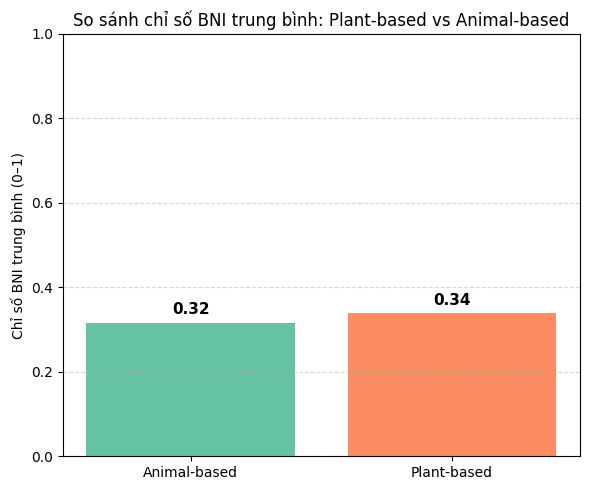

In [90]:
import matplotlib.pyplot as plt

colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6,5))
plt.bar(bni_summary['Type'], bni_summary['BNI'], color=colors)
for i, val in enumerate(bni_summary['BNI']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.title('So sánh chỉ số BNI trung bình: Plant-based vs Animal-based')
plt.ylabel('Chỉ số BNI trung bình (0–1)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Nhận xét:
* Dùng BNI (Balanced Nutrition Index, đo sự cân bằng protein, chất béo, carbohydrate, chất xơ, và năng lượng; cao hơn là tốt hơn) để so sánh. Plant-based (BNI 0.34) nhỉnh hơn animal-based (0.32), nhờ giàu chất xơ và chất chống oxy hóa, hỗ trợ giảm BMI và nguy cơ tim mạch. Animal-based cung cấp protein hoàn chỉnh, tốt cho cơ bắp, nhưng dễ tăng cholesterol. Plant-based bền vững hơn, cần bổ sung B12; animal-based phù hợp ngắn hạn. Kiểm tra nhãn để tránh sản phẩm plant-based chế biến quá mức (tăng natri).

## 4. Kết luận

* Dữ liệu từ USDA Food Database cho thấy sự khác biệt rõ rệt về thành phần dinh dưỡng giữa các nhóm thực phẩm.

* Có mối tương quan mạnh giữa Energy và Fat, trong khi các thực phẩm giàu Water thường có năng lượng thấp.

* Một số nhóm thực phẩm có năng lượng cao nhưng protein thấp, thể hiện xu hướng “chất rỗng”.

* Việc chuẩn hóa và tính chỉ số dinh dưỡng cân bằng (BNI) giúp đánh giá tổng quan giá trị dinh dưỡng của từng nhóm thực phẩm.

# Kết Thúc